<a href="https://colab.research.google.com/github/SamThiagoMedeiros/DesafioFrexco/blob/main/DesafioFrexco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from pandas import read_excel

In [30]:
series = read_excel("dados.xlsx")

In [31]:
series.describe()

,Vendas
count,51.000000
mean,779.019608
std,435.009310
min,18.000000
25%,459.000000
50%,814.000000
75%,1095.500000
max,1692.000000


In [32]:
import matplotlib.pyplot as plt

In [33]:
series.head()

,Data,Vendas
0,2022-12-06,870.0
1,2022-12-07,868.0
2,2022-12-08,1189.0
3,2022-12-09,742.0
4,2022-12-10,317.0


In [34]:
split_point = len(series) - 5

In [35]:
dataset = series[0:split_point]

In [36]:
validation = series[split_point:]

In [37]:
print("Dataset %d, Validation %d" % (len(dataset), len(validation)))

Dataset 46, Validation 5


In [38]:
dataset.to_excel("dataset.xlsx")

In [39]:
validation.to_excel("validation.xlsx")

In [40]:
import pandas as pd
series = pd.read_excel("dataset.xlsx")

In [41]:
import prophet as fbprophet
import pandas as pd

In [42]:
dataframe = pd.DataFrame({"ds": dataset.Data, "y": dataset.Vendas})

In [43]:
from prophet.forecaster import Prophet
model = Prophet()

In [44]:
model.fit(dataframe)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpew0w94m6/uf266_pn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpew0w94m6/yy501hzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15151', 'data', 'file=/tmp/tmpew0w94m6/uf266_pn.json', 'init=/tmp/tmpew0w94m6/yy501hzw.json', 'output', 'file=/tmp/tmpew0w94m6/prophet_modelbjg1ptzu/prophet_model-20230203215250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
futuro = model.make_future_dataframe(periods = 5, freq= "M")

In [46]:
futuro

,ds
0,2022-12-06
1,2022-12-07
2,2022-12-08
3,2022-12-09
4,2022-12-10
5,2022-12-11
6,2022-12-12
7,2022-12-13
8,2022-12-14
9,2022-12-15


In [47]:
saida = model.predict(futuro)

In [48]:
saida[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
44,2023-01-19,1230.725760,914.307588,1551.803398
45,2023-01-20,698.981194,367.461808,1009.174373
46,2023-01-31,978.107045,646.924293,1291.216035
47,2023-02-28,1081.355693,750.697499,1399.283387
48,2023-03-31,957.102814,637.991205,1279.098168
49,2023-04-30,786.632678,431.934683,1109.083250
50,2023-05-31,1429.089753,1095.952434,1766.321031


In [49]:
validation_df = pd.DataFrame({"ds": validation.Data})

In [50]:
validation_df["ds"]

46   2023-01-21
47   2023-01-22
48   2023-01-23
49   2023-01-24
50   2023-01-25
Name: ds, dtype: datetime64[ns]

In [51]:
saida = model.predict(validation_df)

In [52]:
saida[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-21,299.384754,-13.227801,616.337606
1,2023-01-22,425.262410,115.329772,768.892187
2,2023-01-23,1266.380631,937.705352,1590.678782
3,2023-01-24,952.294883,621.164477,1309.006420
4,2023-01-25,964.470838,632.955176,1266.792304


In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.Vendas, saida.yhat))
print("Teste RMSE: %.3f" % rmse)

Teste RMSE: 225.756


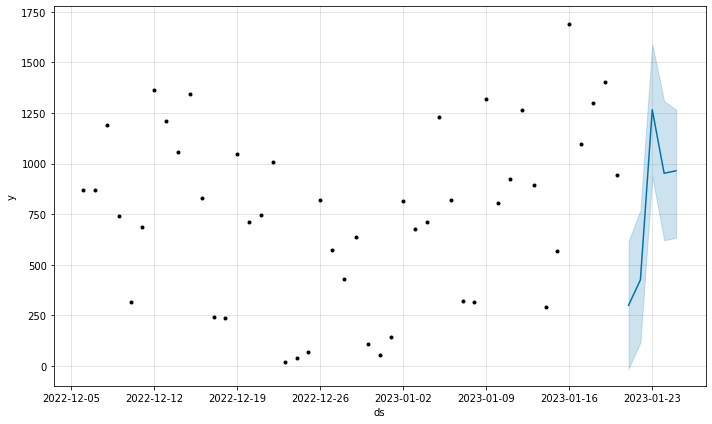

In [54]:
figura = model.plot(saida)

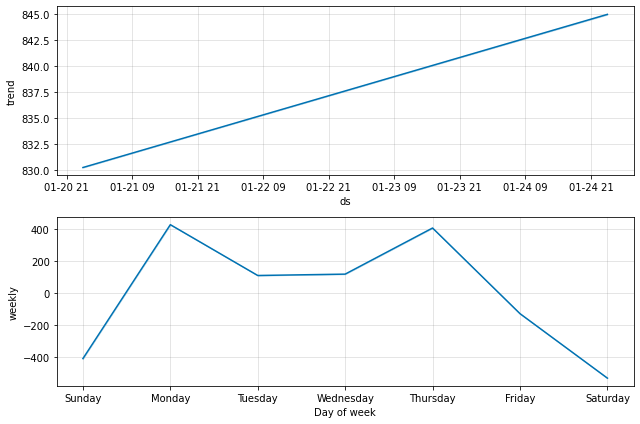

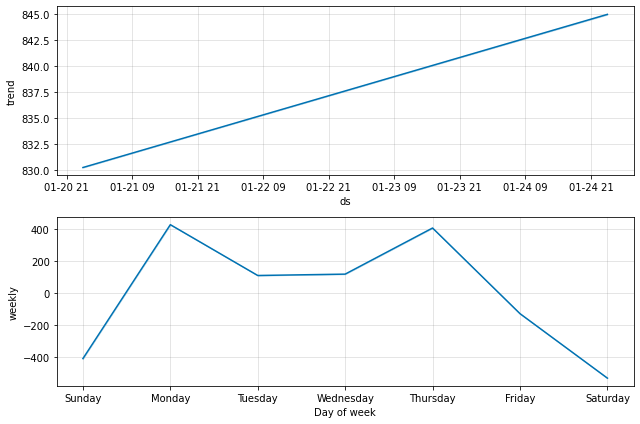

In [55]:
model.plot_components(saida)